# Paycheck Protection Program Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in dataset
relief_df = pd.read_csv("cleaned_data/cleaned_PPP.csv", low_memory=False)

In [3]:
#check rows and columns
relief_df.shape

(261214, 33)

In [4]:
#find non numeric rows in data, these are invalid rows
indextoclear = relief_df[pd.to_numeric(relief_df['Total'], errors='coerce').isnull()].index

In [5]:
#filter out invalid rows
relief_df = relief_df.drop(indextoclear, axis=0)

In [6]:
#check business types listed in dataset
relief_df["BusinessType"].value_counts()

BusinessType
Sole Proprietorship                    74774
Corporation                            66073
Limited  Liability Company(LLC)        35433
Independent Contractors                28956
Self-Employed Individuals              24100
Subchapter S Corporation               20654
Non-Profit Organization                 3824
Partnership                             2189
Limited Liability Partnership           1413
Single Member LLC                       1248
Cooperative                              826
Professional Association                 747
Housing Co-op                            400
501(c)3 – Non Profit                     273
501(c)6 – Non Profit Membership           62
Non-Profit Childcare Center               24
Trust                                     20
Joint Venture                             20
Qualified Joint-Venture (spouses)         19
Employee Stock Ownership Plan(ESOP)       11
Tenant in Common                           7
501(c)19 – Non Profit Veterans            

In [7]:
#list of businesses of interest
business_types = ["Corporation", "Sole Proprietorship", "Limited  Liability Company(LLC)", "Subchapter S Corporation",
                    "Partnership", "Limited Liability Partnership", "Single Member LLC", "Cooperative"]

#filter for only businesses of interest
relief_df = relief_df[relief_df["BusinessType"].isin(business_types)]


# Statistics

In [8]:

#cast JobsReported (# of employees) and Total as int types
relief_df["JobsReported"] = relief_df["JobsReported"].astype(int)
relief_df["Total"] = relief_df["Total"].astype(int)

#Calculate CostPerJob as Total / # of Jobs reported
relief_df["CostPerJob"] = relief_df["Total"] /  relief_df["JobsReported"]

<Axes: >

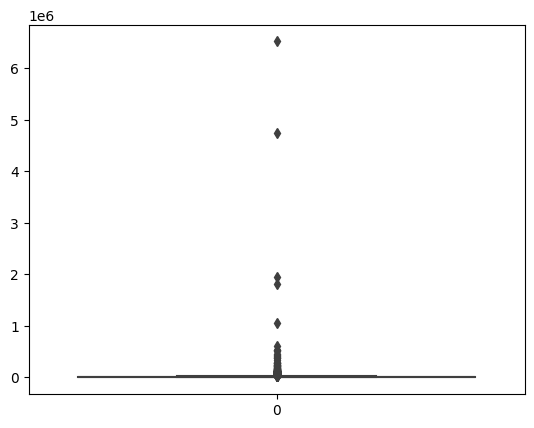

In [9]:
#plot boxplot of Cost Per Job
sns.boxplot(relief_df["CostPerJob"])

We have some major outliers, let's see if we can get rid of them

In [10]:
#filter out outliers by IQR
relief_df["CostPerJob"].astype(float)

#calculate IQR
quartile1 = relief_df["CostPerJob"].quantile(0.25)
quartile3 = relief_df["CostPerJob"].quantile(0.75)
interquartilerange = quartile3 - quartile1


print(interquartilerange)

#filter out rows that are 1.5IQR below Q1 and 1.5IQR above Q3
relief_df = relief_df[~((relief_df["CostPerJob"] < (quartile1 - 1.5 * interquartilerange)) |
               (relief_df["CostPerJob"] > (quartile3 + 1.5 * interquartilerange)))]


13272.5


<Axes: >

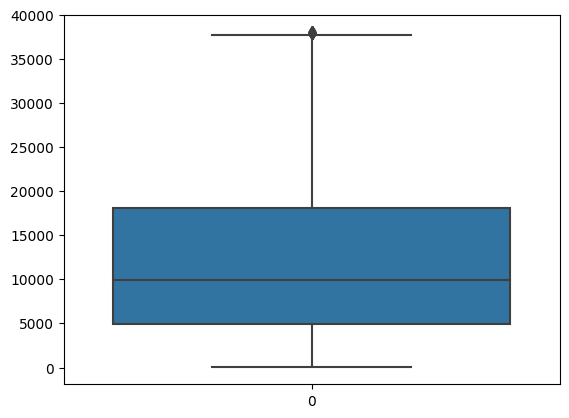

In [11]:
#look at distribution again
sns.boxplot(relief_df["CostPerJob"])

Distribution is much better

In [12]:
#Generate summary statistics about CostPerJob, grouped by Borough and JobsReported (ranges)
grouped = relief_df.groupby(["Borough" , pd.cut(relief_df['JobsReported'], [0, 1, 2, 5, 10, 20, 50, 100])])["CostPerJob"] \
                                                            .agg(median_cost=np.nanmedian,
                                                                 average_cost=np.mean,
                                                                 standard_deviation=np.std,
                                                                 minimum = np.min,
                                                                 maximum = np.max,
                                                                 count = len)


In [13]:
grouped

median_cost  average_cost  standard_deviation   
Borough       JobsReported                                                   
Bronx         (0, 1]        15749.000000  13864.410461         6924.740591  \
              (1, 2]         4570.000000   6043.252368         4710.800055   
              (2, 5]         4600.000000   6132.708867         4657.967172   
              (5, 10]        6603.750000   7747.001082         4950.588394   
              (10, 20]       6774.778846   8106.896170         5098.097246   
              (20, 50]       7635.714286   8719.813348         5370.149203   
              (50, 100]      7695.145604   8029.692974         6007.027702   
Brooklyn      (0, 1]        14580.000000  13489.684579         7141.636341   
              (1, 2]         5836.000000   7782.930989         5862.563729   
              (2, 5]         5520.333333   7217.793840         5336.544923   
              (5, 10]        6377.142857   7774.564953         5165.650131   
              (10, 20]       7115.384615   8133.637959         5043.966233   
              (20, 50]       6788.215142   7702.406901         5364.195165   
              (50, 100]      5666.489899   6338.406825         5842.938226   
Manhattan     (0, 1]        15000.000000  14080.186794         7380.594654   
              (1, 2]        10207.750000  11214.113016         7208.916902   
              (2, 5]         9901.566667  11059.578599         6995.824114   
              (5, 10]       10777.472222  11686.202514         6917.123100   
              (10, 20]      11017.714286  11846.211387         6963.602143   
              (20, 50]      11058.200000  11849.319958         7093.298725   
              (50, 100]     11348.741158  11533.989435         7372.926472   
Queens        (0, 1]        13054.000000  12678.737960         7070.741303   
              (1, 2]         5000.000000   6671.872761         5132.123676   
              (2, 5]         5416.666667   6973.804293         5112.800998   
              (5, 10]        6439.666667   7692.859848         5080.158015   
              (10, 20]       7333.000000   8436.027979         5388.380898   
              (20, 50]       7249.863636   8411.183753         6231.930842   
              (50, 100]      6637.247021   7752.956063         7175.705798   
Staten Island (0, 1]        13000.000000  12858.954669         7121.987990   
              (1, 2]         5838.500000   7737.317853         5911.484001   
              (2, 5]         5583.333333   7150.330392         5297.604099   
              (5, 10]        6267.857143   7318.136631         4963.314038   
              (10, 20]       6535.166667   7899.822284         5505.246049   
              (20, 50]       6224.000000   7776.449790         5931.389905   
              (50, 100]      4954.474576   7370.304402         6824.432559   

                               minimum       maximum  count  
Borough       JobsReported                                   
Bronx         (0, 1]        126.000000  36225.000000  15658  
              (1, 2]         88.500000  37932.500000   1478  
              (2, 5]         90.666667  35693.250000   2782  
              (5, 10]        83.333333  33255.555556   1341  
              (10, 20]      192.750000  30984.210526    846  
              (20, 50]      187.500000  34375.000000    555  
              (50, 100]     150.000000  26426.333333    182  
Brooklyn      (0, 1]        102.000000  38125.000000  31003  
              (1, 2]        238.500000  38114.000000   6057  
              (2, 5]         59.000000  38079.000000   9299  
              (5, 10]        63.200000  37542.500000   5369  
              (10, 20]      138.250000  37127.250000   3245  
              (20, 50]       52.900000  38091.860000   2108  
              (50, 100]      46.875000  33315.650000    708  
Manhattan     (0, 1]          4.000000  38127.000000  24080  
              (1, 2]         79.500000  38117.500000   7468  
              (2, 5]      

In [14]:
grouped.reset_index(inplace=True)

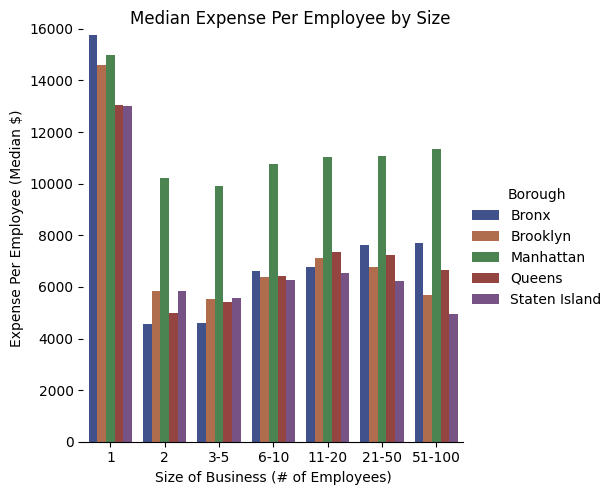

In [15]:
#plot Median Cost Per Reported Job
g = sns.catplot(
    data=grouped, kind="bar",
    x="JobsReported", y="median_cost", hue="Borough",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.legend.set_title("Borough")
g.fig.suptitle("Median Expense Per Employee by Size")
plt.xlabel("Size of Business (# of Employees)")
plt.ylabel("Expense Per Employee (Median $)")
plt.savefig("output/PPP_output/mediancostPPP.png")
plt.show()

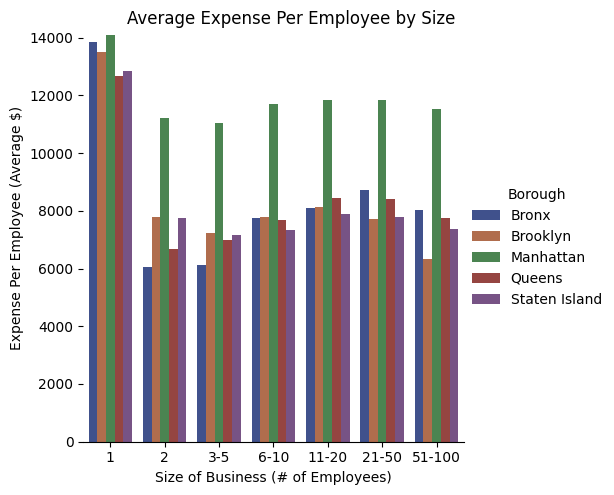

In [16]:
#plot Average Cost Per Reported Job
g = sns.catplot(
    data=grouped, kind="bar",
    x="JobsReported", y="average_cost", hue="Borough",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.legend.set_title("Borough")
g.fig.suptitle("Average Expense Per Employee by Size")
plt.xlabel("Size of Business (# of Employees)")
plt.ylabel("Expense Per Employee (Average $)")
plt.savefig("output/PPP_output/averagecostPPP.png")
plt.show()

# Total

In [17]:
grouped_total = relief_df.groupby([pd.cut(relief_df['JobsReported'], [0, 1, 2, 5, 10, 20, 50, 100])])["Total"] \
                                                                .agg(median_cost=np.nanmedian,
                                                                     average_cost=np.mean,
                                                                     standard_deviation=np.std,
                                                                     minimum = np.min,
                                                                     maximum = np.max,
                                                                     count = len)

In [18]:
grouped_total

,median_cost,average_cost,standard_deviation,minimum,maximum,count
JobsReported,,,,,,
"(0, 1]",14539.0,13460.014054,7167.825318,4,38127,99901
"(1, 2]",12933.5,17258.639751,12958.844115,159,76235,20744
"(2, 5]",24850.0,32548.361934,25425.173233,236,190355,34277
"(5, 10]",58848.0,71916.142974,50689.292360,500,380325,20738
"(10, 20]",121106.0,144710.961392,98934.360799,1000,742545,13132
"(20, 50]",260000.0,314060.010713,234111.951565,1587,1904593,9428
"(50, 100]",581263.5,663988.210890,540009.615257,2100,3114017,3324


In [19]:
grouped_total.reset_index(inplace=True)

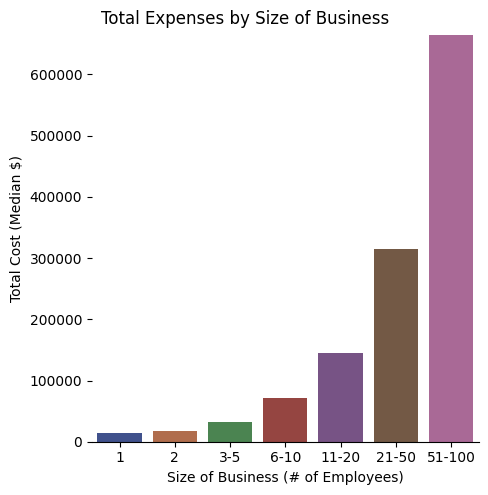

In [20]:
g = sns.catplot(
    data=grouped_total, kind="bar",
    x="JobsReported", y="average_cost",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_axis_labels("Size of Business (# of Employees)", "Total Cost (Median $)")
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.fig.suptitle("Total Expenses by Size of Business")
plt.savefig("output/PPP_output/medianTotalCostPPP.png")
plt.show()